In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


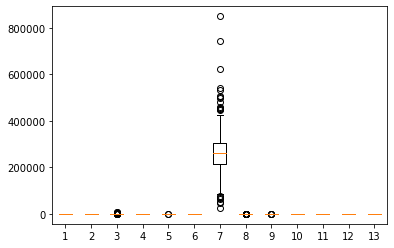

In [7]:
# Show Outliers
plt.boxplot(data)
plt.show()

## Remove Outliers

In [10]:
outliers_cols = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine' , 'serum_sodium']
for col in outliers_cols:
    q1 = data[col].quantile(0.25)
    q2 = data[col].quantile(0.75)
    iqr = q2 - q1
    for i in data.index:
        if data.loc[i, col] > q2:
            data.loc[i, col] = q2 + iqr * 1.5
        if data.loc[i, col] < q1:
            data.loc[i, col] = q1 - iqr * 1.5

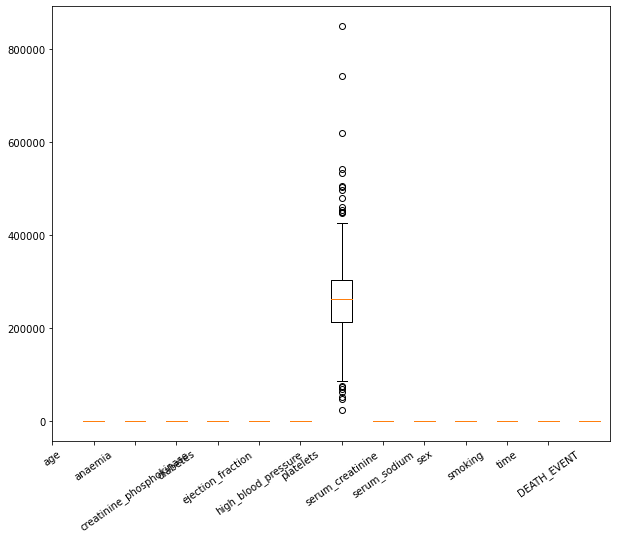

In [23]:
# after removing outliers
plt.figure(figsize=(10,8))
plt.boxplot(data)
plt.xticks(range(13),labels=data.columns, rotation=35)
plt.show()

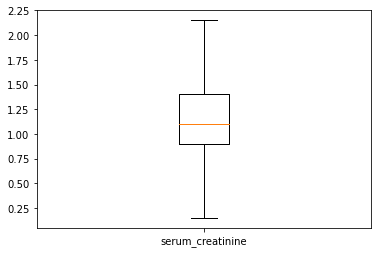

In [26]:
# Boxplot showing serum creatinine
plt.boxplot(data['serum_creatinine'], labels=["serum_creatinine"])
plt.show()

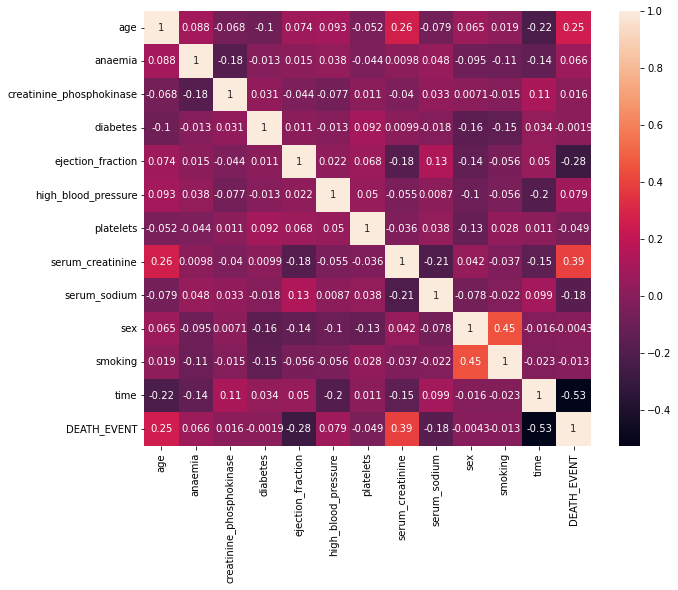

In [43]:
# Corrleation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

## From the above heat map we can determine which factors are more correlated with Death Event

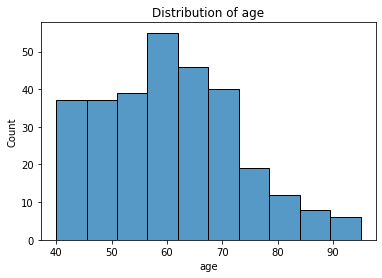

In [31]:
sns.histplot(x='age', data=data)
plt.title('Distribution of age')
plt.show()

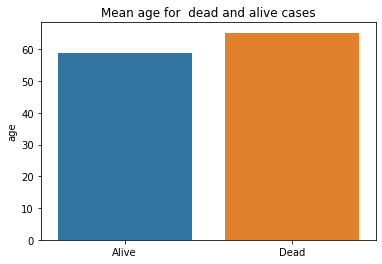

In [50]:
# The mean age for dead and alive cases
death_age = data.groupby('DEATH_EVENT')['age'].mean()
sns.barplot(x = ['Alive', 'Dead'], y=death_age)
plt.title( "Mean age for  dead and alive cases")
plt.show()

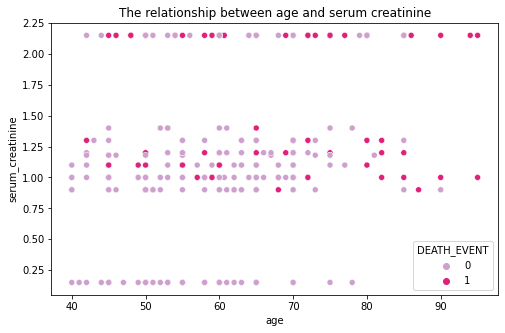

In [65]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y = 'serum_creatinine', hue='DEATH_EVENT', data=data, palette='PuRd')
plt.title('The relationship between age and serum creatinine')
plt.show()